# Image compression

In this problem, we are going to use k-means to compress images by reducing the number of colors.

The input image is $512 \times 512$ pixel size each of which is described by a $24$-bit color ($8$ bit per RGB channel). If you store the image pixel-wise it will take $512 \times 512 \times 3 = 786432$ bytes.

If we reduce the number of colors, this will reduce the number of bits stored significantly. In order to ensure the quality of the compressed images, we have to figure out what colors to keep the maximum information. Here is where k-means steps in. We will find 16 groups of similar colors and change every 24-bit color to the centroid of the corresponding group.

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Initialization

Loading an image for compression.

In [3]:
input_image_file = "mandrill-large.png"

Number of colors for the output image (i.e. number of clusters).

In [4]:
num_colors = num_clusters = 16

Random seed.


In [5]:
random_seed = 42

## Loading the data

Loading the data as an array of pixels.

In [6]:
input_img = img.imread(input_image_file)

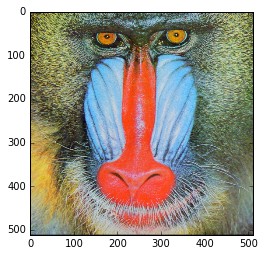

In [7]:
plt.imshow(input_img)
plt.show()

Initializing $m \times n$ training matrix.

In [8]:
color_depth = input_img.shape[-1]

In [9]:
X = input_img.reshape(-1, color_depth)

In [10]:
X.shape

(262144, 3)

## K-Means clustering

In [44]:
np.random.seed(random_seed)

Initialize centroids as colors of random pixels of the picture.

In [55]:
# =============== TODO: Your code here ===============
# Initialize centroids

centroids = np.array([X[np.random.randint(X.shape[0])] for i in range(num_colors)])
# ====================================================

In [57]:
print(centroids.shape)
centroids

(16, 3)


array([[0.50980395, 0.6392157 , 0.6745098 ],
       [0.34901962, 0.4627451 , 0.5058824 ],
       [0.45882353, 0.65882355, 0.46666667],
       [0.35686275, 0.6       , 0.59607846],
       [0.25490198, 0.25882354, 0.36078432],
       [0.54901963, 0.75686276, 0.87058824],
       [0.2509804 , 0.3019608 , 0.3529412 ],
       [0.38431373, 0.6901961 , 0.8980392 ],
       [0.4862745 , 0.5019608 , 0.3882353 ],
       [0.34901962, 0.4509804 , 0.31764707],
       [0.7411765 , 0.5176471 , 0.40784314],
       [0.4509804 , 0.4627451 , 0.49019608],
       [0.3882353 , 0.47058824, 0.28235295],
       [0.6117647 , 0.7019608 , 0.5764706 ],
       [0.7294118 , 0.6117647 , 0.62352943],
       [0.39215687, 0.48235294, 0.48235294]], dtype=float32)

Initizlizing a variable for storing closest centroids for every pixel.

In [114]:
closest_centroids = np.zeros(len(X))

Find the closest centroid for every data point.

In [116]:
def get_closest_centroids(X, centroids):
    # =============== TODO: Your code here ===============
    # Find the index of the closest centroid for each data point. The function should return np.array.
    
    # Comment: obviously argmin will work perfectly for values without application of final np.sqrt
    # I did this just to comply with theoretic rule that we take the argmin of Euclidian norm
    distances = np.sqrt(np.square(centroids[:,None] - X).sum(axis=2).T)
    return distances.argmin(1)
    # return np.zeros(len(X), dtype="int")
    # ====================================================

Move centroids to the mean of all assigned points.

In [183]:
def move_centroids(X, closest_centroids, num_clusters):
    # =============== TODO: Your code here ===============
    # Recompute the coordinates of each centroid. The function should return np.array.
    new_centroinds = np.zeros((num_clusters,X.shape[-1]))
    
    for centr in range(num_clusters):
        examples_in_cluster = np.where(closest_centroids==centr)[0]
        new_centroinds[centr] = X[examples_in_cluster].mean(axis = 0)
        
    return new_centroinds
    # return np.zeros((num_clusters, X.shape[-1]))
    # ====================================================

Compute k-means cost function.

In [185]:
def kmeans_objective(X, centroids, closest_centroids):
    # =============== TODO: Your code here ===============
    # Compute the K-Means objective function.
    sum_cost = 0
    
    for centr in range(num_clusters):
        examples_in_cluster = np.where(closest_centroids==centr)[0]
        sum_cost += np.square(X[examples_in_cluster] - centroids[centr]).sum()
    
    return sum_cost
    # return np.random.randint(0, len(X))
    # ====================================================

Implement k-means iteration until convergence.

In [186]:
objective_history = []
convergence = False
iteration = 0

while not convergence:
    # =============== TODO: Your code here ===============
    # Implement k-means iteration until convergence.  
    
    # Convergence is defined as the state when centroinds don't move anymore
    closest_centroids = get_closest_centroids(X, centroids)
    new_centroids = move_centroids(X, closest_centroids, num_clusters)
    if np.array_equal(centroids, new_centroids): convergence = True
    centroids = new_centroids    
    # ====================================================
    # Compute the objective.
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)

    # Increase iteration counter
    iteration += 1
    
    print("Iteration: {0:2d}    Objective: {1:.3f}".format(iteration, objective))

Iteration:  1    Objective: 3704.575
Iteration:  2    Objective: 3231.271
Iteration:  3    Objective: 3013.309
Iteration:  4    Objective: 2925.675
Iteration:  5    Objective: 2885.981
Iteration:  6    Objective: 2864.647
Iteration:  7    Objective: 2852.452
Iteration:  8    Objective: 2844.700
Iteration:  9    Objective: 2839.177
Iteration: 10    Objective: 2835.448
Iteration: 11    Objective: 2832.835
Iteration: 12    Objective: 2830.990
Iteration: 13    Objective: 2829.689
Iteration: 14    Objective: 2828.708
Iteration: 15    Objective: 2827.922
Iteration: 16    Objective: 2827.306
Iteration: 17    Objective: 2826.764
Iteration: 18    Objective: 2826.316
Iteration: 19    Objective: 2825.863
Iteration: 20    Objective: 2825.331
Iteration: 21    Objective: 2824.707
Iteration: 22    Objective: 2823.923
Iteration: 23    Objective: 2822.857
Iteration: 24    Objective: 2821.535
Iteration: 25    Objective: 2819.745
Iteration: 26    Objective: 2817.324
Iteration: 27    Objective: 2814.046
I

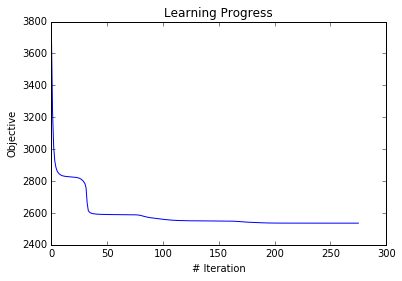

In [187]:
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="Objective")
ax.set(title="Learning Progress")

plt.show()

## Compression results

Represent each point as a closest centroid.

In [188]:
output_img = centroids[closest_centroids].reshape(input_img.shape)

Compare original and compressed images.

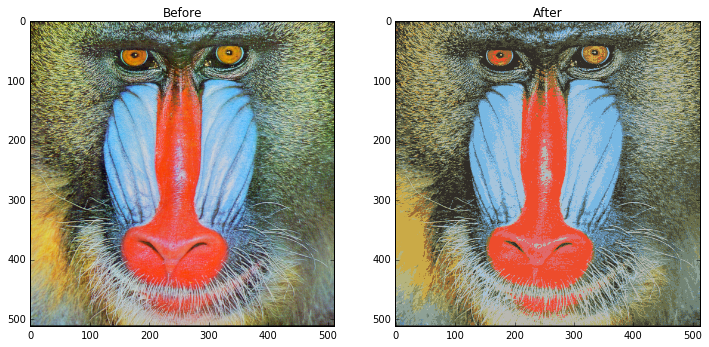

In [189]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()